### `Import the main Libraries`

In [2]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Other
import os, joblib

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import RobustScaler, OneHotEncoder, PolynomialFeatures

## sklearn -- metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
## sklearn -- Models
from sklearn.ensemble import RandomForestClassifier

## Xgboost
from xgboost import XGBClassifier
#light gpm
from lightgbm import LGBMClassifier


### Data Collection and Processing

In [3]:
## Read the CSV file using pandas
FILE_PATH = os.path.join(os.getcwd(), 'heart.csv')
heart = pd.read_csv(FILE_PATH)


## Show the Head of the DF
heart.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart.tail()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
heart.shape

(918, 12)

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
# checking the distribution of Target Variable
heart['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### Handling Missing Data & Duplicates

In [9]:
heart.drop_duplicates(inplace=True)

In [10]:
heart.isnull().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### **EDA**

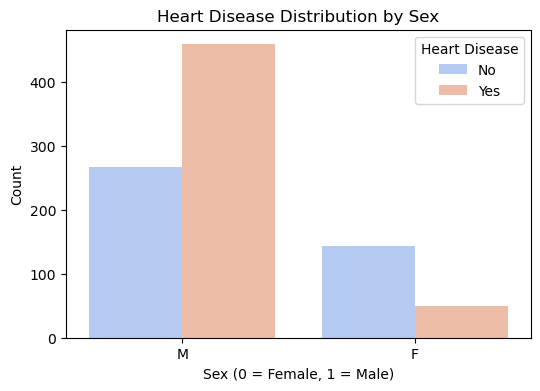

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="HeartDisease", data=heart, palette="coolwarm")
plt.title("Heart Disease Distribution by Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

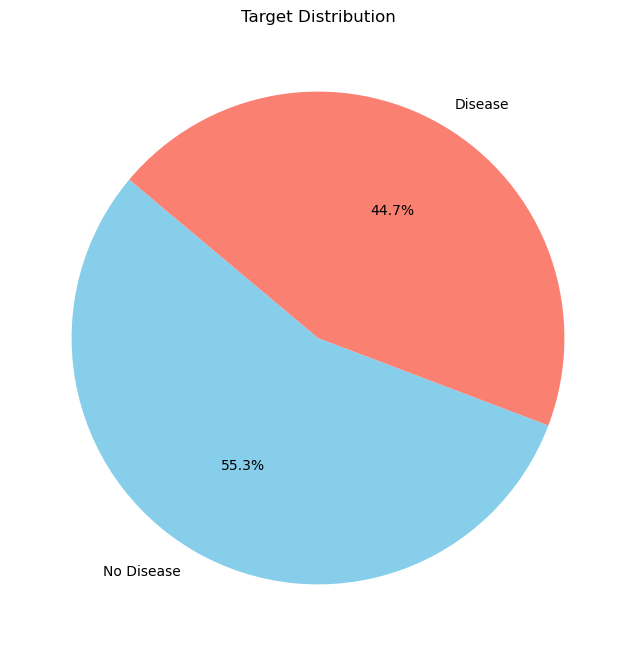

In [12]:
target_counts = heart["HeartDisease"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=["No Disease", "Disease"], autopct='%1.1f%%', startangle=140, colors=["skyblue", "salmon"])
plt.title("Target Distribution")
plt.show() 

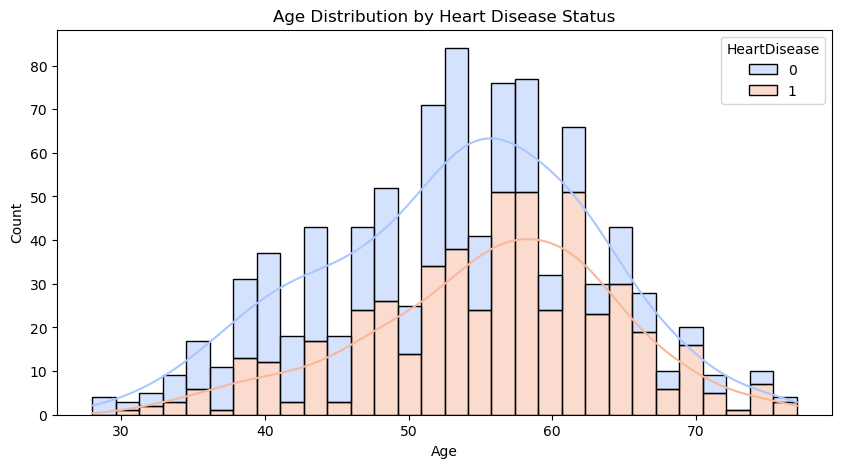

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=heart, x="Age", hue="HeartDisease", multiple="stack", bins=30, palette="coolwarm", kde=True)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [14]:
heart["ST_Slope"].unique()


array(['Up', 'Flat', 'Down'], dtype=object)

In [15]:
heart["ChestPainType"].unique()


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
heart["RestingECG"].unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

In [17]:
heart["ST_Slope"].unique()


array(['Up', 'Flat', 'Down'], dtype=object)

### ### `Split the Dataset`


In [18]:
## Split the whole Dataset to Feature & Target
X = heart.drop(columns=['HeartDisease'], axis=1)   ## Features
y = heart['HeartDisease']   ## target


In [19]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42) 
## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (734, 11)
y_train shape --  (734,)
X_test shape --  (184, 11)
y_test shape --  (184,)


In [20]:
# Separete the columns according to type (numerical or categorical)

num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]#numarical
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]#categorical


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
********************************************************************************
Categorical Columns : 
 ['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [21]:

num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', RobustScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse_output=False))])

## concatenate both two pipelines
#FeatureUnion to union num and categ and it takes transformer_list which takes list of tuples
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train) 
X_test_final = total_pipeline.transform(X_test) 

In [22]:
X_train_final.shape , X_test_final.shape


((734, 20), (184, 20))

In [23]:
y_train.shape , y_test.shape

((734,), (184,))

### `Building ML Models`


### ` RandomForest`

In [24]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1) 
forest_clf.fit(X_train_final , y_train)  ## train

RandomForestClassifier(max_depth=6, max_samples=0.8, n_estimators=150,
                       n_jobs=-1, random_state=42)

In [25]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(forest_clf, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(forest_clf, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(forest_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8912 0.9048 0.8435 0.8571 0.8425]
Mean Accuracy: 0.8678
CV F1 Scores: [0.8912 0.9046 0.8425 0.8557 0.8409]
Mean F1: 0.8670
Final Accuracy: 0.8678
Confusion Matrix:
[[271  62]
 [ 35 366]]


### `RF Tuning`

In [26]:
#RandomizedSearchCV search "randomly" for hyperparameters used cross validation 

params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2),        
                      'max_samples':np.arange(.1, 1, .1) } 
## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_clf, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='accuracy', 
                                          cv=5, verbose=6, random_state=42)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.898 total time=   0.2s
[CV 2/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.905 total time=   0.2s
[CV 3/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.850 total time=   0.2s
[CV 4/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.871 total time=   0.3s
[CV 5/5] END max_depth=10, max_samples=0.30000000000000004, n_estimators=200;, score=0.849 total time=   0.2s
[CV 1/5] END max_depth=6, max_samples=0.6, n_estimators=400;, score=0.878 total time=   0.5s
[CV 2/5] END max_depth=6, max_samples=0.6, n_estimators=400;, score=0.898 total time=   0.5s
[CV 3/5] END max_depth=6, max_samples=0.6, n_estimators=400;, score=0.857 total time=   0.5s
[CV 4/5] END max_depth=6, max_samples=0.6, n_estimators=400;, score=0.857 total time=   0.5s
[CV 5/5] END max

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=6,
                                                    max_samples=0.8,
                                                    n_estimators=150, n_jobs=-1,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='accuracy', verbose=6)

In [27]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)
## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': np.int64(200), 'max_samples': np.float64(0.8), 'max_depth': np.int64(12)}
best_forest --  RandomForestClassifier(max_depth=np.int64(12), max_samples=np.float64(0.8),
                       n_estimators=np.int64(200), n_jobs=-1, random_state=42)


In [28]:

# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_forest, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_forest, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_forest, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8912 0.898  0.8503 0.8776 0.8562]
Mean Accuracy: 0.8746
CV F1 Scores: [0.8913 0.8979 0.8492 0.8771 0.8547]
Mean F1: 0.8740
Final Accuracy: 0.8747
Confusion Matrix:
[[278  55]
 [ 37 364]]


### ` XGboost`

In [29]:
## Using the Hero API -- XGBOOST
xgb_clf = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_clf.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [30]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(xgb_clf, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(xgb_clf, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(xgb_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8844 0.8844 0.8367 0.8163 0.863 ]
Mean Accuracy: 0.8570
CV F1 Scores: [0.8845 0.8843 0.8359 0.8166 0.8614]
Mean F1: 0.8565
Final Accuracy: 0.8569
Confusion Matrix:
[[275  58]
 [ 47 354]]


### `Tuning XGBoost`

In [31]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 30), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.7,0.8, 0.9]}
grid_xgb = GridSearchCV(estimator=xgb_clf, param_grid=params_best_xgb, cv=5, 
                        scoring='accuracy', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 130, 160, 190]),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=6)

In [32]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': np.int64(100), 'subsample': 0.8}
best_xgb --  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(2), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None, ...)


In [33]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_xgb, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_xgb, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_xgb, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8776 0.898  0.8435 0.8571 0.8767]
Mean Accuracy: 0.8706
CV F1 Scores: [0.8778 0.8979 0.8429 0.8572 0.8757]
Mean F1: 0.8703
Final Accuracy: 0.8706
Confusion Matrix:
[[281  52]
 [ 43 358]]


### `LGBM`

In [34]:
lgbm_clf = LGBMClassifier( n_estimators=100,max_depth=6,learning_rate=0.1,subsample=0.8,random_state=42)

In [35]:
lgbm_clf.fit(X_train_final, y_train)

[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(max_depth=6, random_state=42, subsample=0.8)

In [36]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(lgbm_clf, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(lgbm_clf, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(lgbm_clf, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8503 0.8707 0.8707 0.8027 0.8699]
Mean Accuracy: 0.8529
CV F1 Scores: [0.8506 0.8708 0.8705 0.8029 0.8689]
Mean F1: 0.8527
Final Accuracy: 0.8529
Confusion Matrix:
[[277  56]
 [ 52 349]]


### `Tuning LGBM`

In [37]:
### Let's try tuning lgbm using GridSearchCV  --- needs alot of tuning
params_best_lgbm = {'n_estimators': np.arange(100, 200, 30), 'max_depth': np.arange(2, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.7,0.8, 0.9]}
grid_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=params_best_lgbm, cv=5, 
                        scoring='accuracy', n_jobs=-1, verbose=6)
grid_lgbm.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[LightGBM] [Info] Number of positive: 401, number of negative: 333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546322 -> initscore=0.185819
[LightGBM] [Info] Start training from score 0.185819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

GridSearchCV(cv=5,
             estimator=LGBMClassifier(max_depth=6, random_state=42,
                                      subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 130, 160, 190]),
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=6)

In [38]:
## Get the best Params
best_lgbm_params = grid_lgbm.best_params_
print('best_lgbm_params -- ', best_lgbm_params)

## Get the best estimator
best_lgbm = grid_lgbm.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_lgbm)

best_lgbm_params --  {'learning_rate': 0.1, 'max_depth': np.int64(2), 'n_estimators': np.int64(100), 'subsample': 0.7}
best_xgb --  LGBMClassifier(max_depth=np.int64(2), n_estimators=np.int64(100),
               random_state=42, subsample=0.7)


In [39]:
# Cross-validated accuracy scores
accuracy_scores = cross_val_score(best_lgbm, X=X_train_final, y=y_train,
                                cv=5, scoring='accuracy', n_jobs=-1)
print(f'CV Accuracy Scores: {np.round(accuracy_scores, 4)}')
print(f'Mean Accuracy: {accuracy_scores.mean():.4f}')

# Cross-validated F1 scores (handles class imbalance)
f1_scores = cross_val_score(best_lgbm, X=X_train_final, y=y_train,
                          cv=5, scoring='f1_weighted', n_jobs=-1)
print(f'CV F1 Scores: {np.round(f1_scores, 4)}')
print(f'Mean F1: {f1_scores.mean():.4f}')

# Get cross-val predictions
y_pred = cross_val_predict(best_lgbm, X=X_train_final, y=y_train, cv=5, n_jobs=-1)

# Final metrics
print(f'Final Accuracy: {accuracy_score(y_train, y_pred):.4f}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred))

CV Accuracy Scores: [0.8844 0.8912 0.8367 0.8503 0.8836]
Mean Accuracy: 0.8692
CV F1 Scores: [0.8846 0.891  0.8359 0.8503 0.8824]
Mean F1: 0.8688
Final Accuracy: 0.8692
Confusion Matrix:
[[279  54]
 [ 42 359]]


In [40]:
joblib.dump(best_xgb, 'heart_disease_model.sav.pkl')

['heart_disease_model.sav.pkl']

In [41]:
loaded_model = joblib.load('heart_disease_model.sav.pkl')
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None,
              max_depth=np.int64(2), max_leaves=None, min_child_weight=None,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(100), n_jobs=None, num_parallel_tree=None, ...)

### `Inference on Test Dataset`

In [42]:
y_pred_test = loaded_model.predict(X_test_final) 

## accuraccy on test after finishing all my work
accuracy_test = np.sqrt(accuracy_score(y_test, y_pred_test)) 
print(f'accuracy on test Dataset using XGBOOST -- {accuracy_test:.3f}') 

accuracy on test Dataset using XGBOOST -- 0.935
